# **Regresión lógística binomial**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score

## **Carga de datos**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_data = pd.read_csv('/content/drive/MyDrive/Umanizales/2024-1/Simulación/Reg Logistica/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Obtenemos Información de las variables**

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df_data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

## **Preprocesamiento de los datos**

### **Cambiar total_charges a numeric**

In [9]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

### **Manejo de datos nulos**

In [10]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
13*100/7043

0.18458043447394576

In [12]:
df_data.dropna(inplace=True)

### **Eliminar id**

In [13]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_data.shape

(7032, 21)

In [15]:
df_data.drop('customerID',axis=1,inplace=True)

### **Convertir a numérico variable objetivo**

In [16]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [17]:
df_data_processing = df_data.copy()

## **Manejo de variables categóricas - One-hot encoding**

In [18]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [19]:
df_data_processing = df_data_processing.astype(int)

In [20]:
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [21]:
df_data_processing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   tenure                                   7032 non-null   int64
 2   MonthlyCharges                           7032 non-null   int64
 3   TotalCharges                             7032 non-null   int64
 4   Churn                                    7032 non-null   int64
 5   gender_Female                            7032 non-null   int64
 6   gender_Male                              7032 non-null   int64
 7   Partner_No                               7032 non-null   int64
 8   Partner_Yes                              7032 non-null   int64
 9   Dependents_No                            7032 non-null   int64
 10  Dependents_Yes                           7032 non-null   int64
 11  PhoneServ

### **Analisis de correlación**

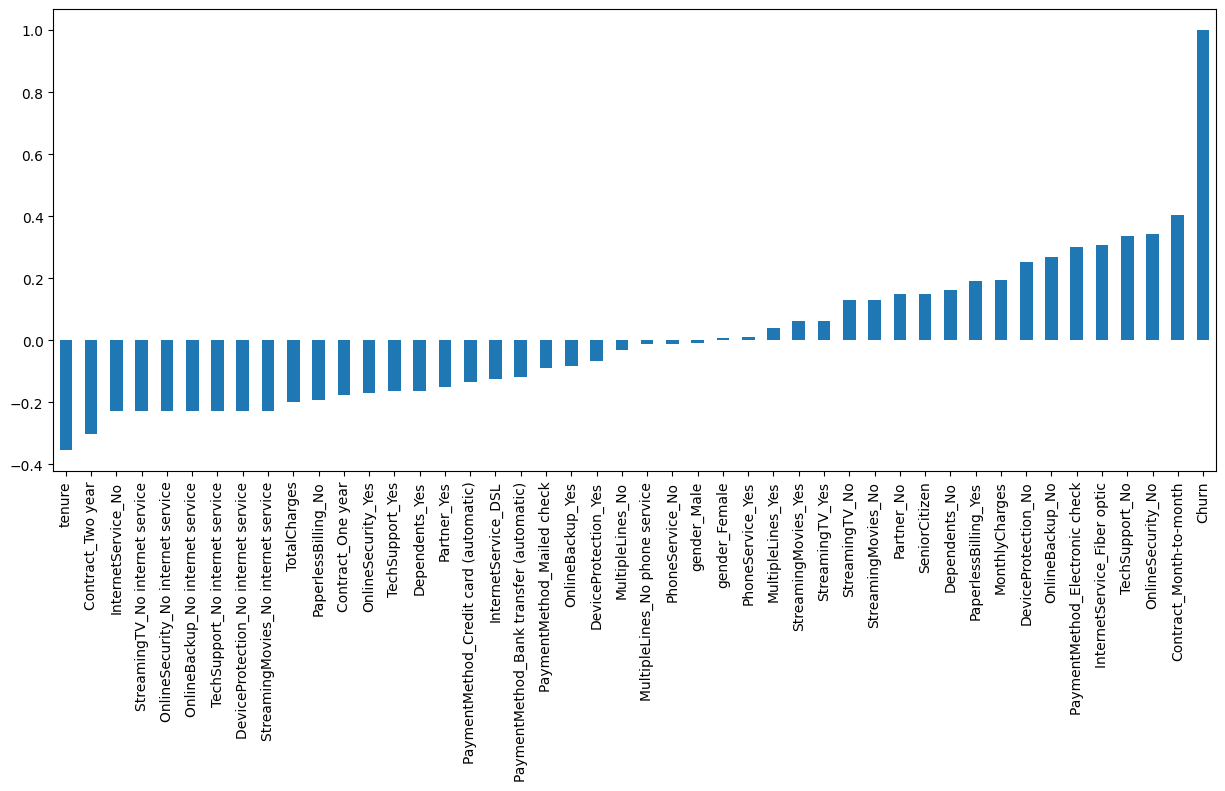

In [22]:
fig = plt.figure(figsize=(15,6))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

### **Escalabilidad de los datos**

In [23]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [24]:
df_data_processing_scaled

array([[0.        , 0.        , 0.11      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11      , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.56      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.87      , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [26]:
df_data_processing_scaled.columns = df_data_processing.columns

In [27]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.11,0.001269,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.38,0.215901,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.35,0.010385,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.24,0.210247,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.52,0.015347,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **Análisis exploratorio de datos**

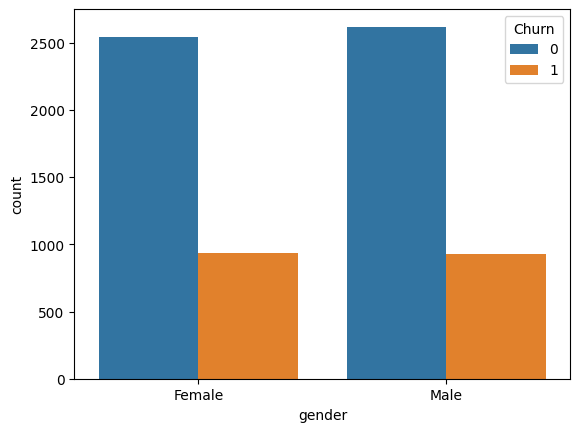

In [28]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [29]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [30]:
column_cat = df_data.select_dtypes(include='object').columns

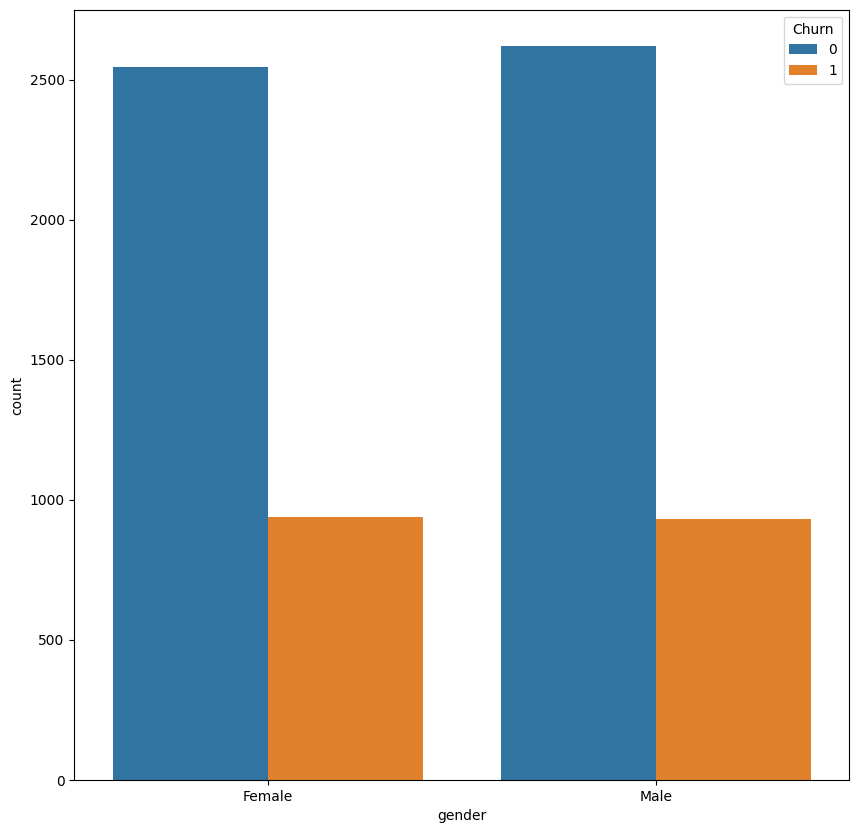

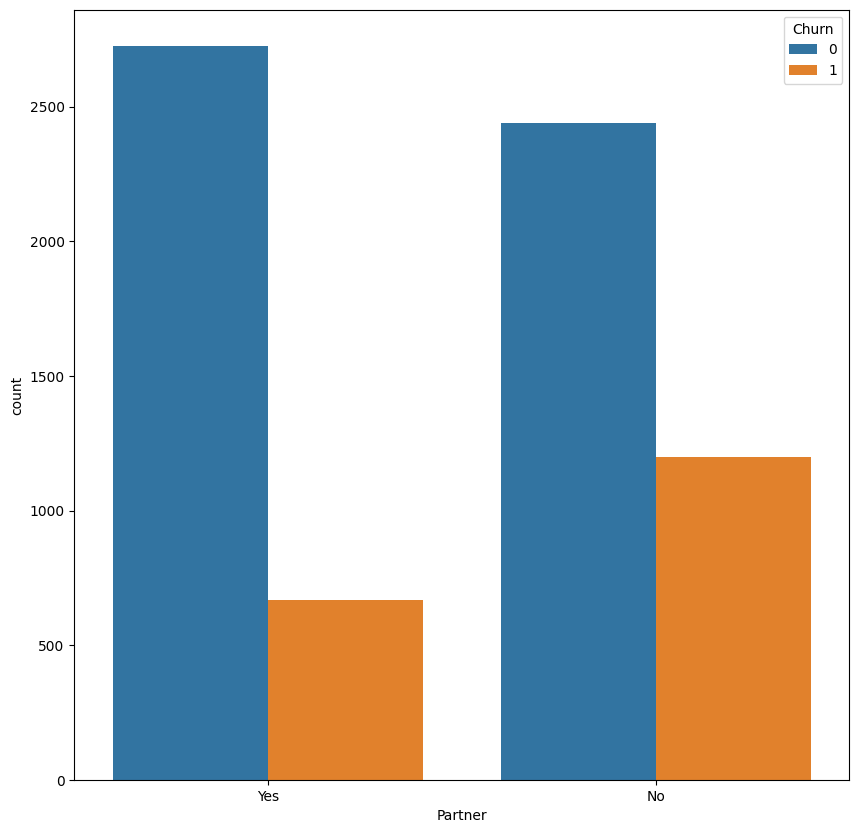

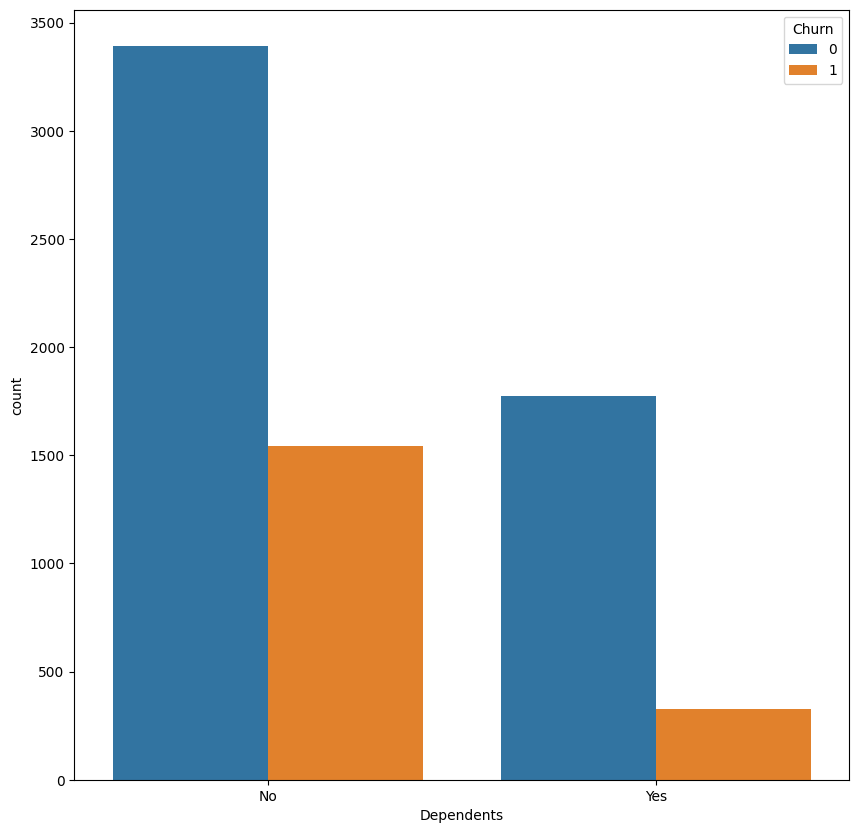

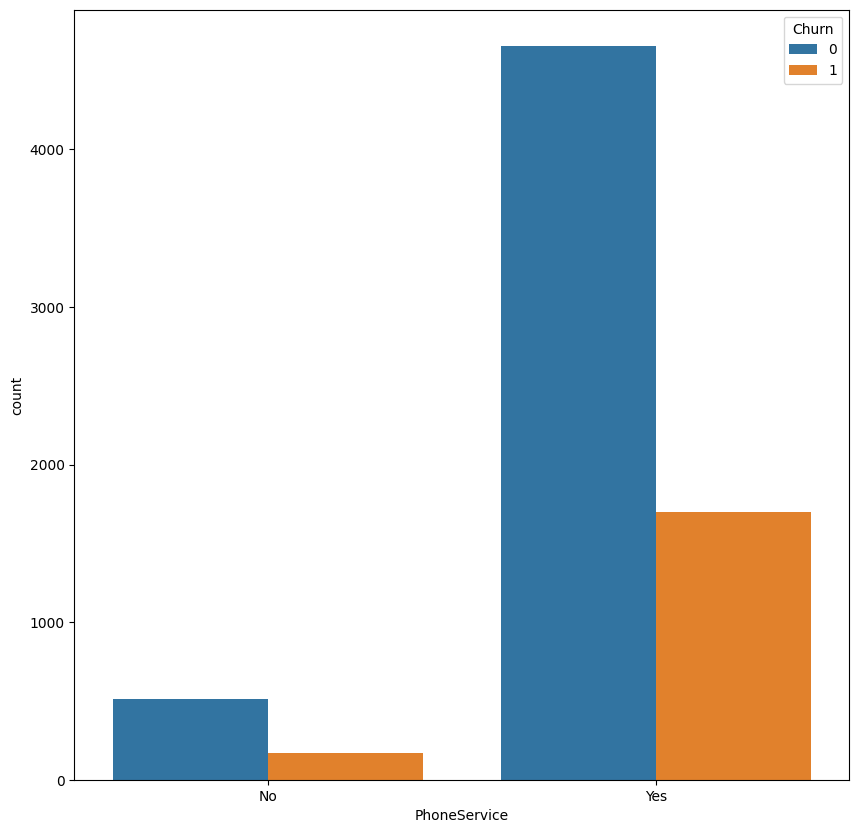

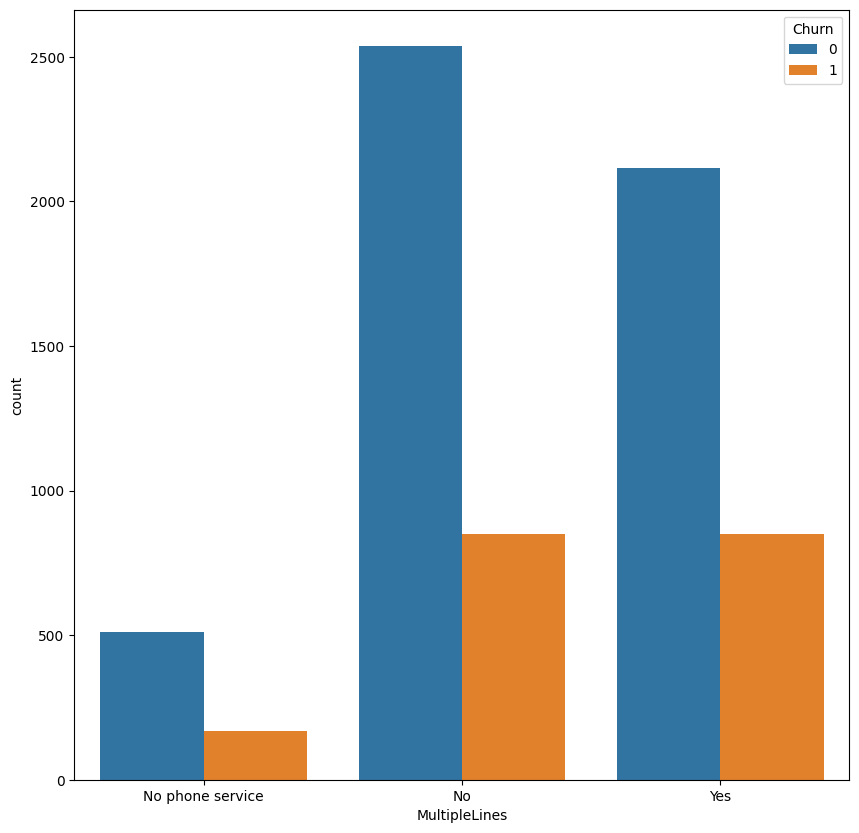

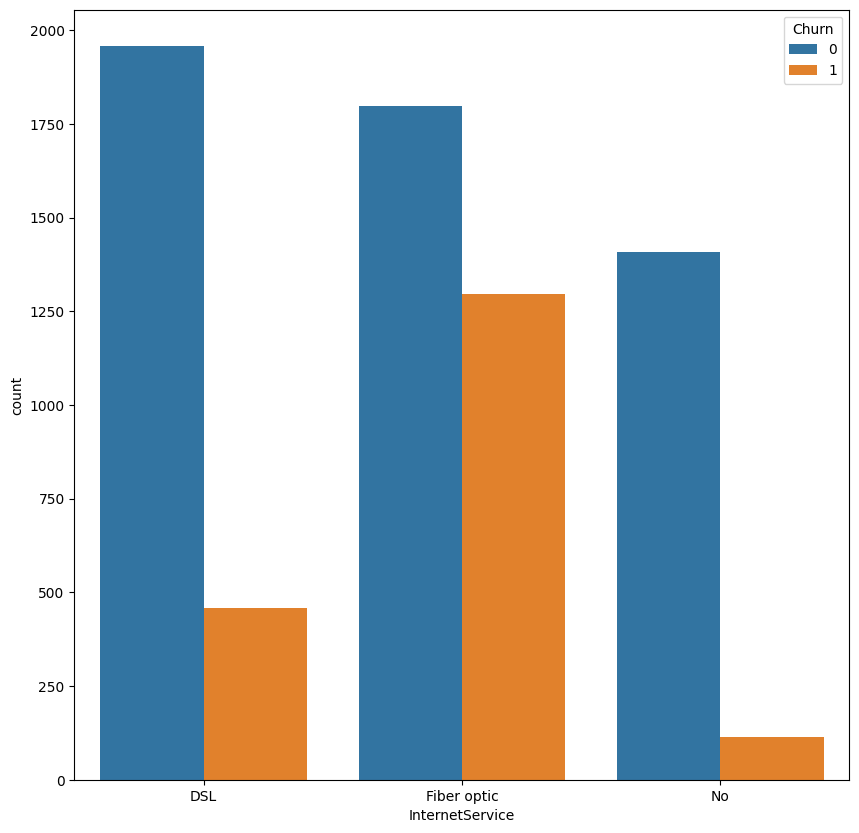

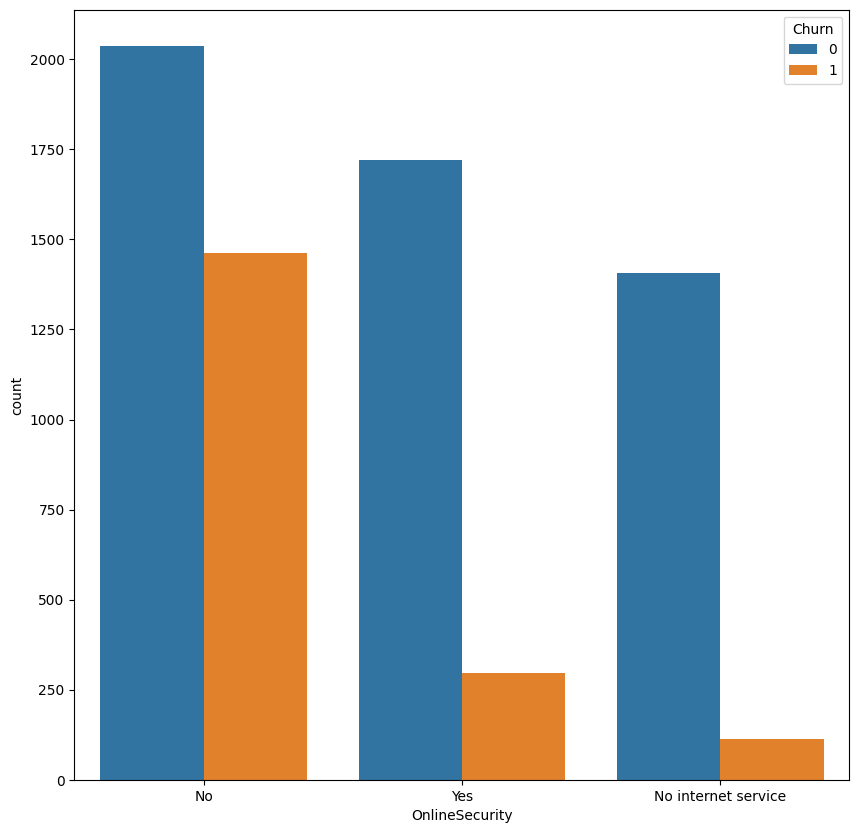

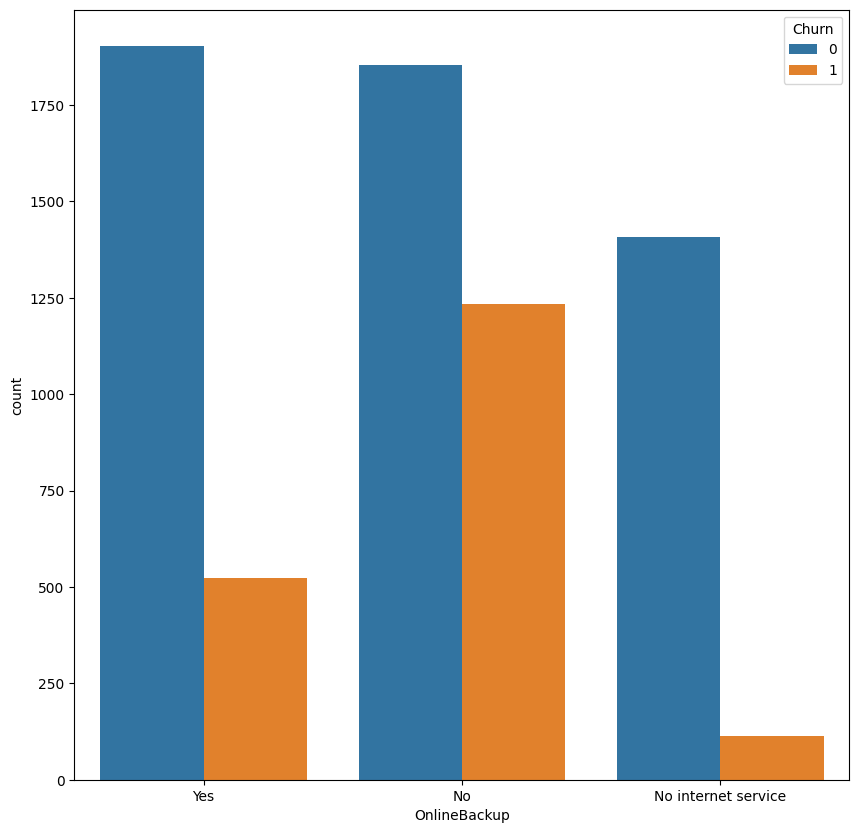

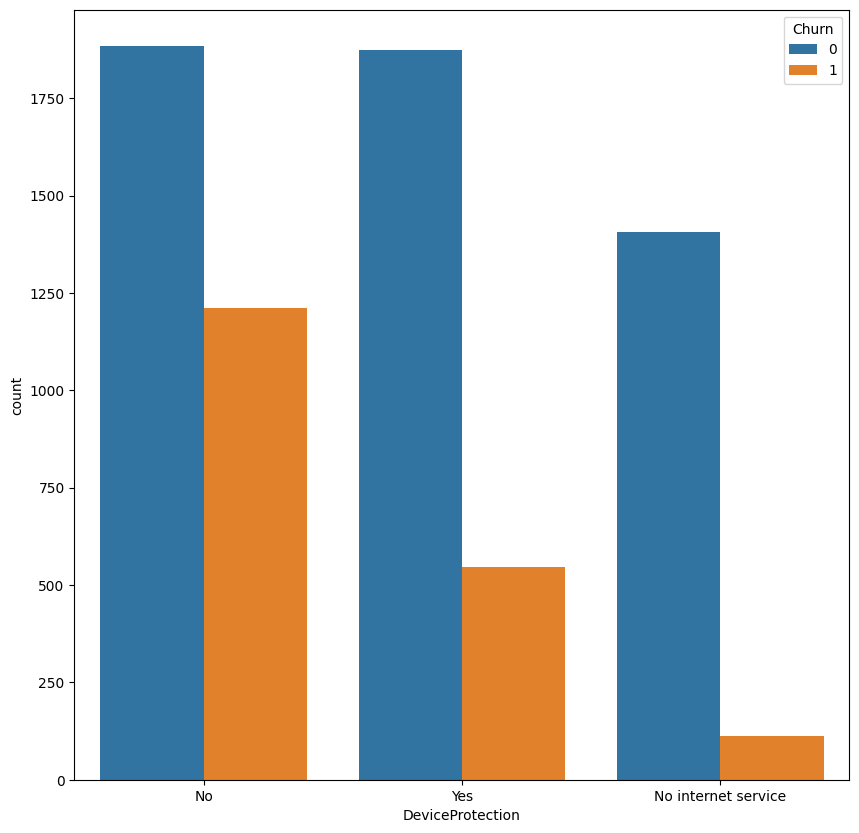

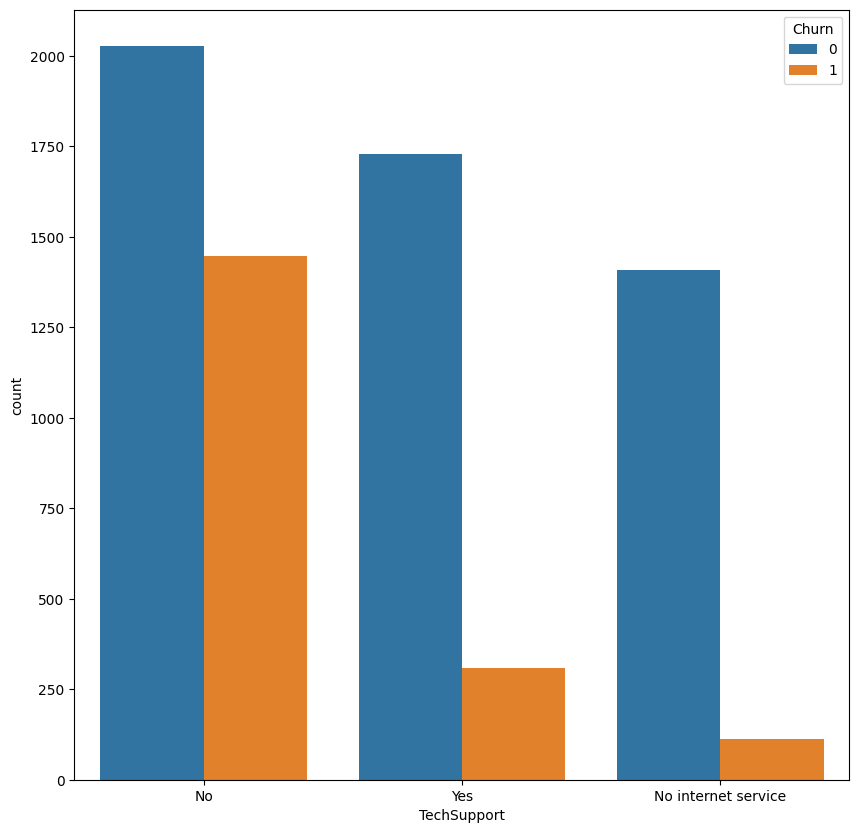

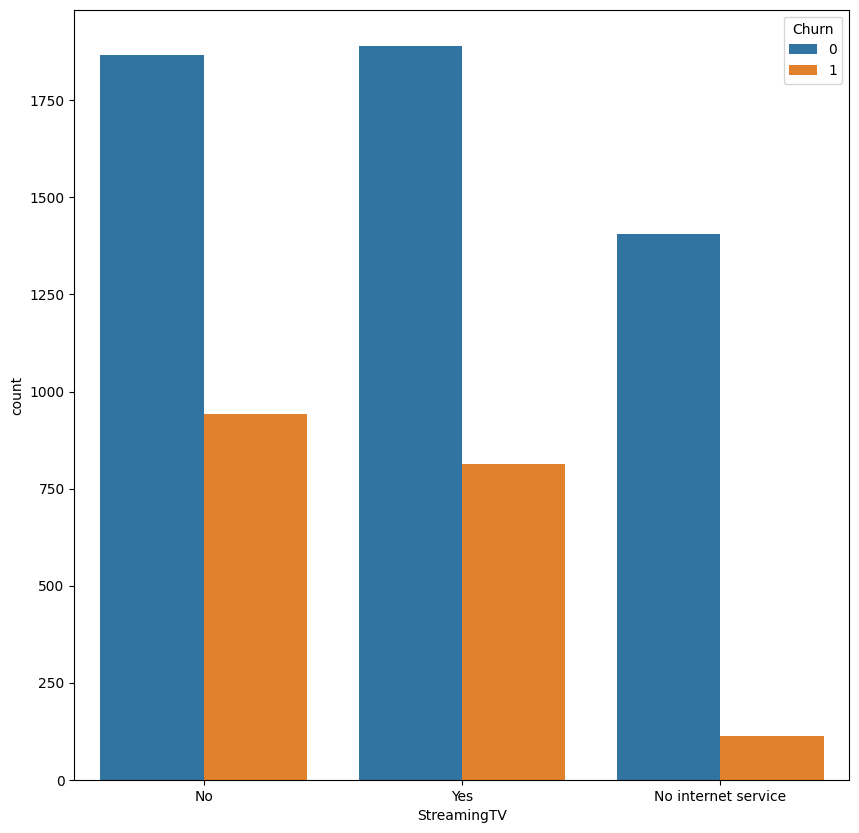

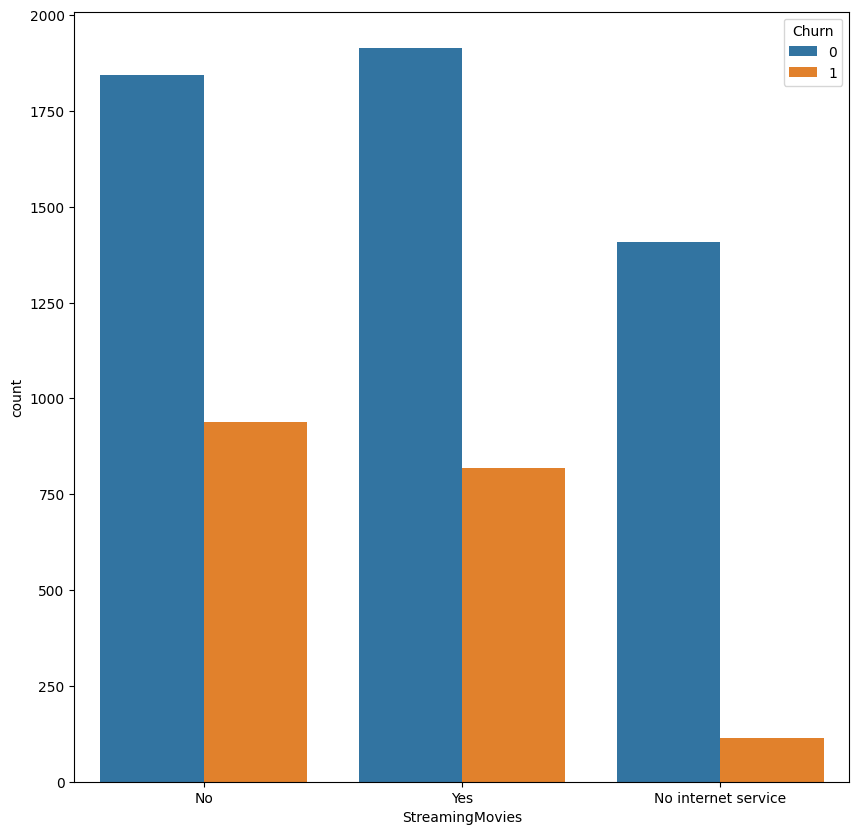

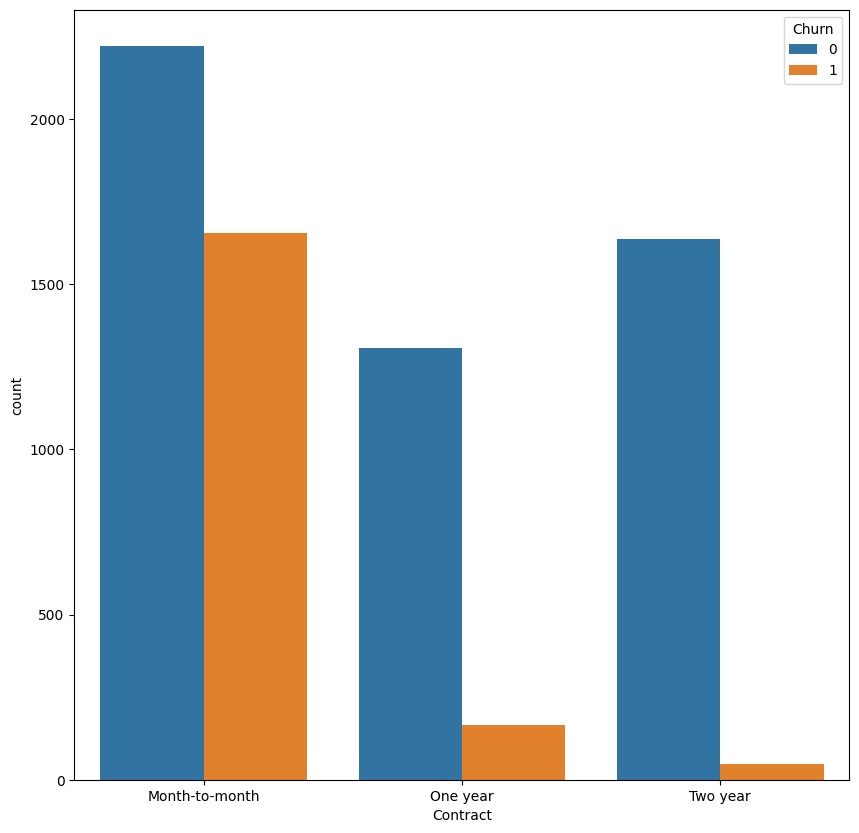

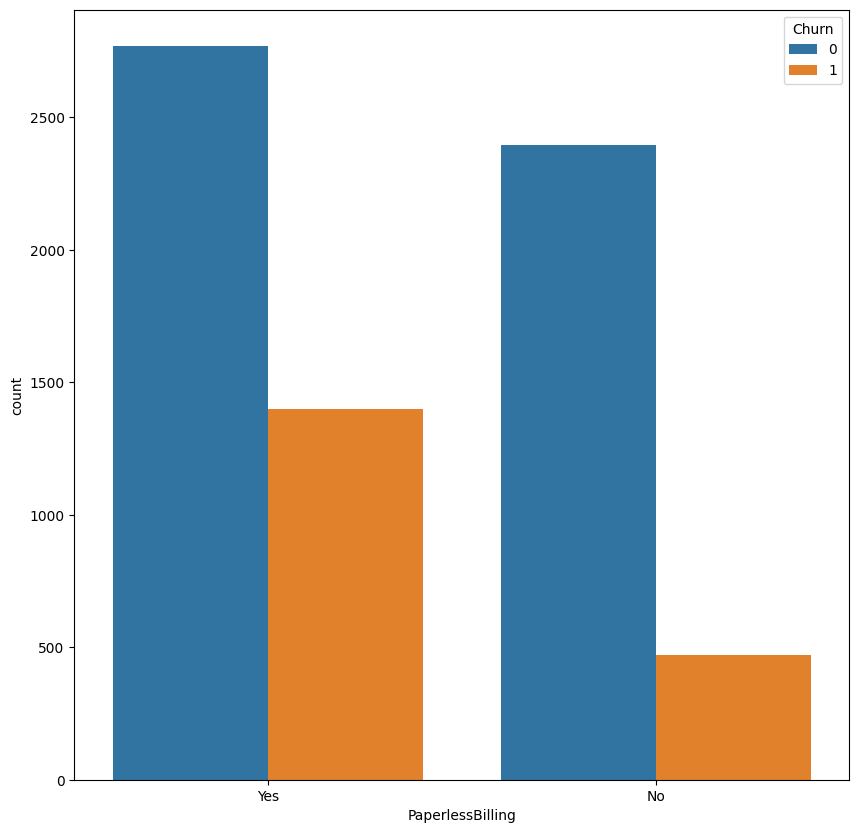

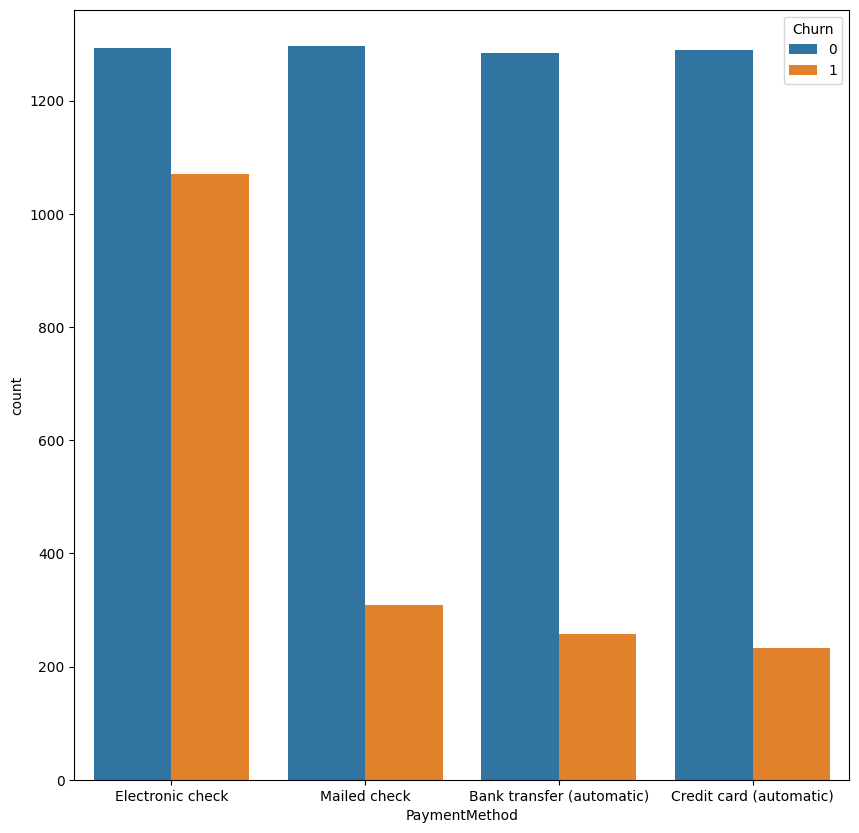

In [31]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

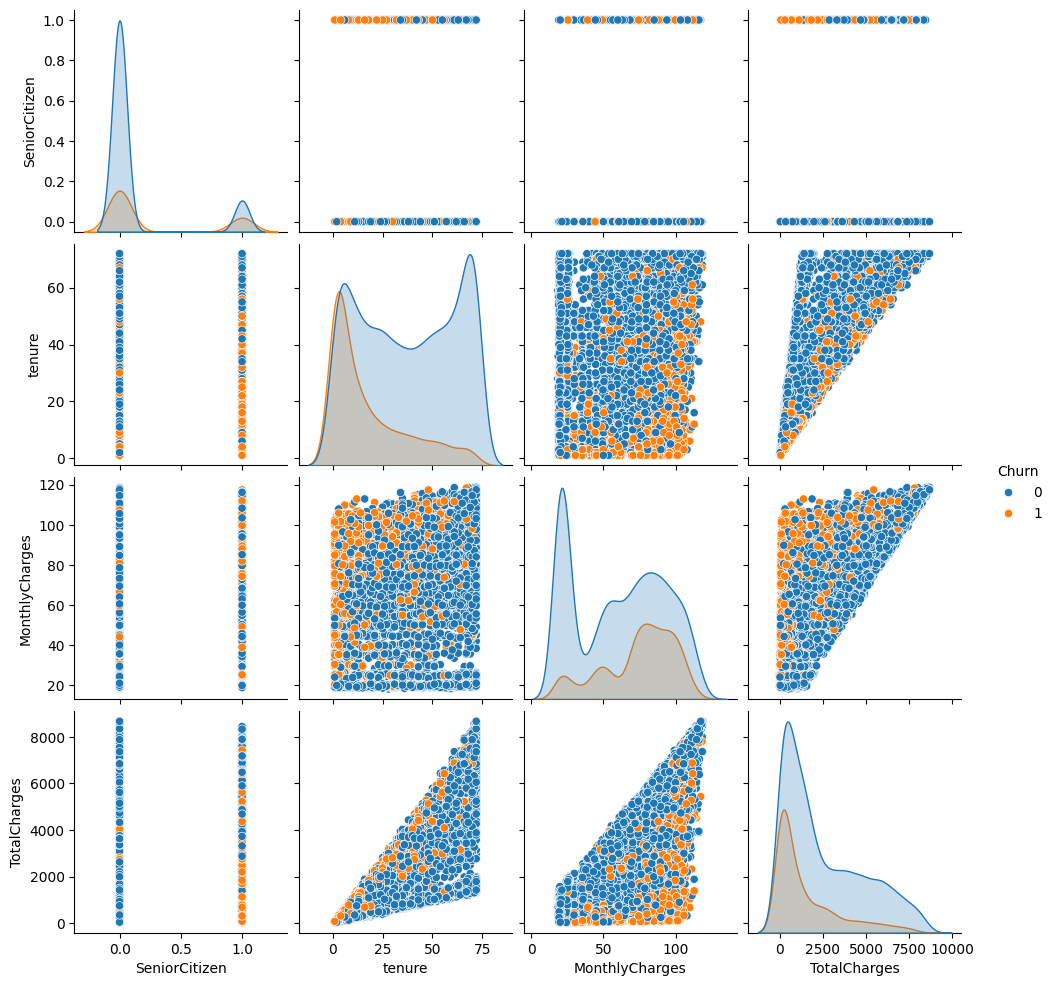

In [32]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## **Entrenamiento del modelo de regresión logística binomial**

In [33]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [35]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.795734597156398


## **Evaluación del modelo**

In [37]:
model.predict_proba(X_test)

array([[0.99027203, 0.00972797],
       [0.86175929, 0.13824071],
       [0.30114278, 0.69885722],
       ...,
       [0.99036059, 0.00963941],
       [0.70097017, 0.29902983],
       [0.82886419, 0.17113581]])

In [38]:
model.coef_

array([[ 2.17846919e-01, -3.11014163e+00, -1.08678019e-01,
         1.20304497e+00,  1.02020254e-02, -1.30454159e-02,
        -6.26218352e-02,  5.97784448e-02,  1.26587668e-01,
        -1.29431058e-01,  9.65390392e-02, -9.93824297e-02,
        -1.54803880e-01,  9.65390392e-02,  5.54214503e-02,
        -4.06167274e-01,  5.09427261e-01, -1.06103378e-01,
         2.45657192e-01, -1.06103378e-01, -1.42397204e-01,
         8.97762044e-02, -1.06103378e-01,  1.34837833e-02,
         6.21776938e-02, -1.06103378e-01,  4.10822940e-02,
         2.26519621e-01, -1.06103378e-01, -1.23259633e-01,
        -7.86411207e-02, -1.06103378e-01,  1.81901108e-01,
        -7.98953339e-02, -1.06103378e-01,  1.83155322e-01,
         7.49443153e-01, -8.88027871e-02, -6.63483757e-01,
        -1.04986365e-01,  1.02142975e-01,  2.97872667e-03,
        -1.53872882e-01,  2.20628840e-01, -7.25780756e-02]])

In [39]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

## **Importancia de las características**

Axes(0.125,0.11;0.775x0.77)


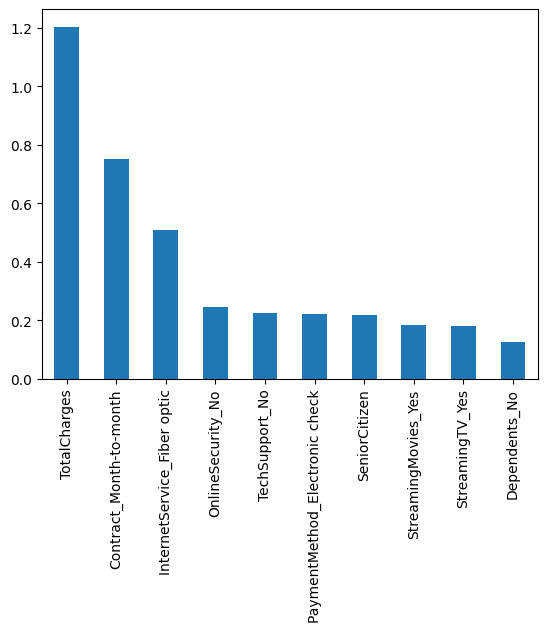

In [40]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


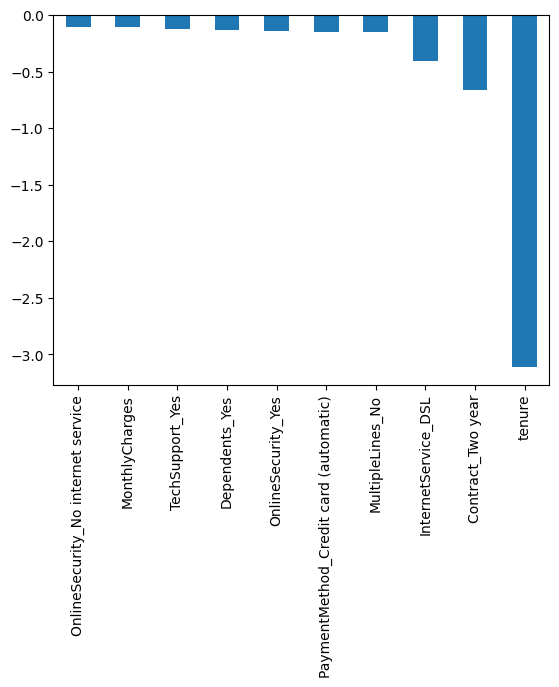

In [41]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

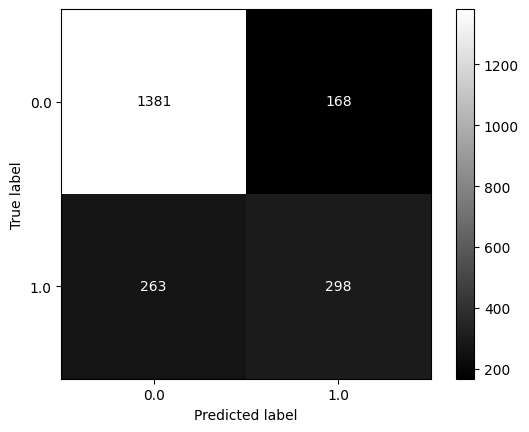

In [42]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [43]:
accuracy = accuracy_score(y_test, prediction_test)
print(f"Exactitud del modelo: {accuracy}")

# Calcula la precisión del modelo
# Nota: Para la precisión y otros métricas (como recall, f1-score), necesitas especificar el parámetro 'average'
# si tienes más de dos clases. Por ejemplo, podrías usar 'micro', 'macro', 'weighted', o 'binary' para el promedio.
precision = precision_score(y_test, prediction_test, average='binary')
print(f"Precisión del modelo: {precision}")


Exactitud del modelo: 0.795734597156398
Precisión del modelo: 0.6394849785407726


## **Curva ROC**

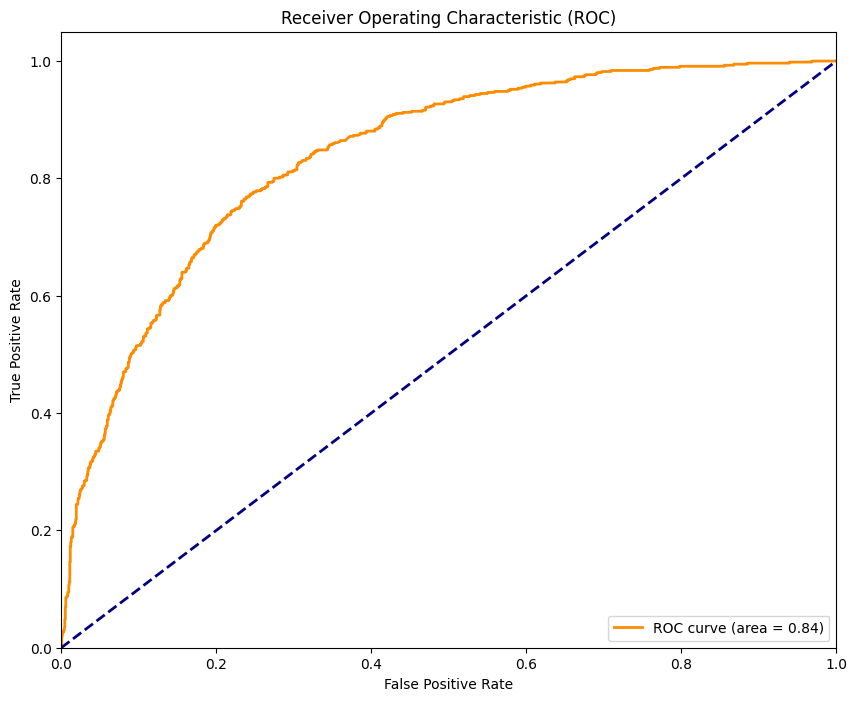

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]

# Ahora calculamos los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculamos el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficamos la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## **Balanceo de la Variable de Respuesta**

In [65]:
Churn_var= df_data.Churn.value_counts()
Churn_var

Churn
0    5163
1    1869
Name: count, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar sobremuestreo a los datos de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [80]:
pd.Series(y_train_smote).value_counts()

1.0    3614
0.0    3614
Name: count, dtype: int64

In [81]:
model2 = LogisticRegression()
result2 = model2.fit(X_train_smote, y_train_smote)

In [82]:
prediction_test2 = model2.predict(X_test)
metrics.accuracy_score(y_test,prediction_test2)

0.7502369668246446

In [83]:
model2.predict_proba(X_test)

array([[0.98899449, 0.01100551],
       [0.75681156, 0.24318844],
       [0.13013741, 0.86986259],
       ...,
       [0.98722375, 0.01277625],
       [0.47205982, 0.52794018],
       [0.64314151, 0.35685849]])

In [84]:
model2.coef_

array([[ 1.75637380e-01, -4.10109104e+00, -4.28718772e-01,
         2.57453478e+00, -7.39722394e-03,  2.91704440e-03,
        -7.90775057e-02,  7.45973262e-02,  1.75293240e-01,
        -1.79773419e-01,  8.33329393e-02, -8.78131188e-02,
        -1.35922600e-01,  8.33329393e-02,  4.81094812e-02,
        -4.07049784e-01,  5.12643969e-01, -1.10074365e-01,
         2.81033732e-01, -1.10074365e-01, -1.75439547e-01,
         1.00909229e-01, -1.10074365e-01,  4.68495628e-03,
         5.55472813e-02, -1.10074365e-01,  5.00469043e-02,
         2.65799679e-01, -1.10074365e-01, -1.60205493e-01,
        -7.09103880e-02, -1.10074365e-01,  1.76504574e-01,
        -9.67651118e-02, -1.10074365e-01,  2.02359297e-01,
         8.09559712e-01, -4.34632264e-02, -7.70576665e-01,
        -1.61996010e-01,  1.57515830e-01, -7.84834045e-02,
        -1.64544263e-01,  2.85953850e-01, -4.74063613e-02]])

Axes(0.125,0.11;0.775x0.77)


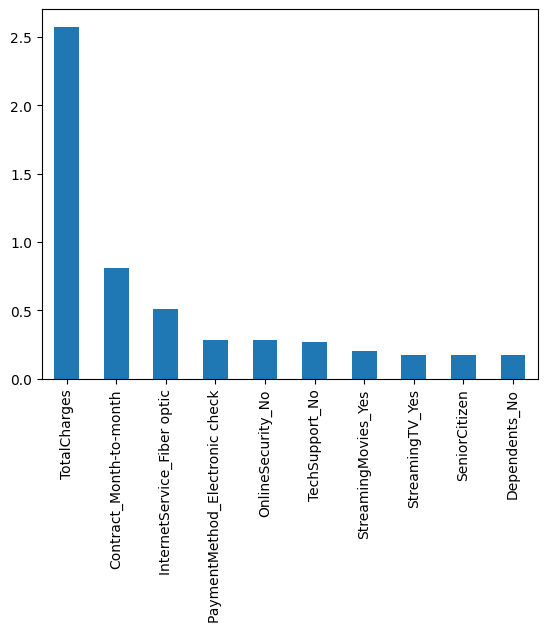

In [85]:
weights2 = pd.Series(model2.coef_[0],
                    index=X.columns.values)
print(weights2.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


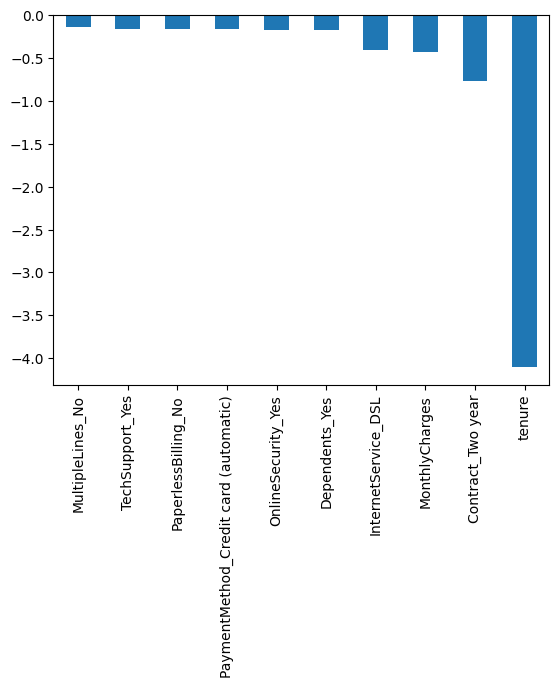

In [59]:
print(weights2.sort_values(ascending=False)[-10:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

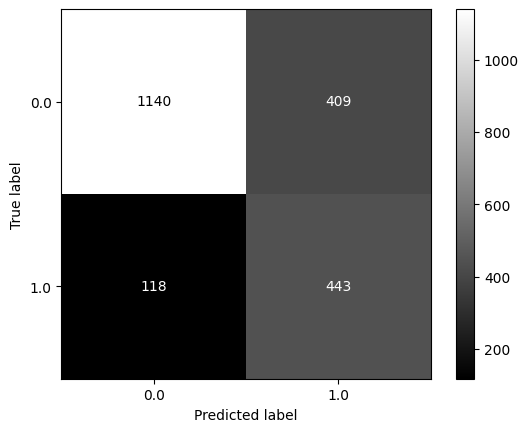

In [86]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model2.classes_)
disp.plot(cmap='gray')
plt.show()

In [87]:
accuracy = accuracy_score(y_test, prediction_test2)
print(f"Exactitud del modelo: {accuracy}")

# Calcula la precisión del modelo
# Nota: Para la precisión y otros métricas (como recall, f1-score), necesitas especificar el parámetro 'average'
# si tienes más de dos clases. Por ejemplo, podrías usar 'micro', 'macro', 'weighted', o 'binary' para el promedio.
precision = precision_score(y_test, prediction_test2, average='binary')
print(f"Precisión del modelo: {precision}")

Exactitud del modelo: 0.7502369668246446
Precisión del modelo: 0.5199530516431925


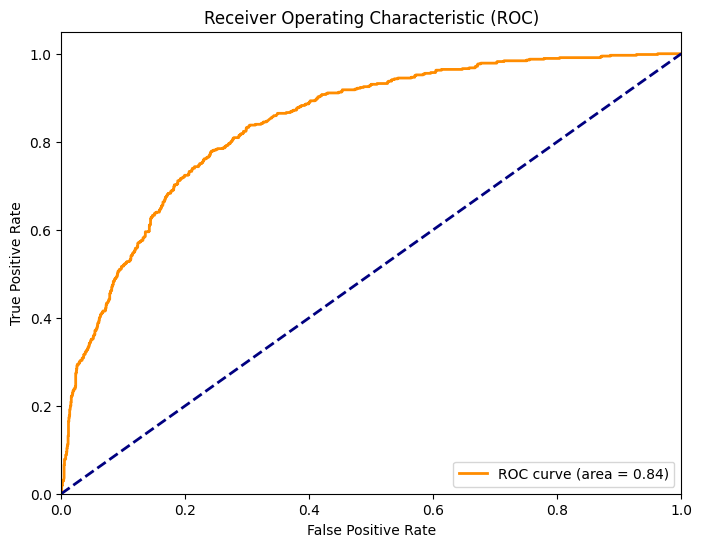

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model2.predict_proba(X_test)[:, 1]

# Ahora calculamos los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculamos el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()